In [1]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import glob
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import seaborn as snb; snb.set()
from colormap import rgb2hex
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
img_dir = "C:/Users/javie/OneDrive/Documentos/CIMAT/Ciencia de datos/Tarea 3/Ejercicio 3/data_fruits_tarea" 
#To download this dataset go to https://drive.google.com/drive/folders/1Zx1qiZn0ceI2_BlaqDRHR9AzsBoCYdej
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
B,G,R=[],[],[]
im_m=np.zeros((np.shape(files)[0],3))
for i,f1 in enumerate(files):
    img = cv2.imread(f1)
    #b=cv2.split(img)
    R.append(cv2.split(img)[0])
    G.append(cv2.split(img)[1])
    B.append(cv2.split(img)[2])
    im_m[i,0]=np.median(img[:,:,0])   #medianR
    im_m[i,1]=np.median(img[:,:,1])   #medianG
    im_m[i,2]=np.median(img[:,:,2])   #medianB
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(RGB_img)
x_tra = StandardScaler().fit_transform(im_m)

In [103]:
np.shape(files)

(1300,)

In [45]:
images=[]
for j in range(1300):
    im = plt.imread(files[j])
    images.append(im)

In [4]:
labels=np.array([["Manzana Braeburn"]*100,["Manzana Golden"]*100, ["Manzana verde"]*100, ["Albaricoque"]*100, ["Aguacate"]*100,
         ["Carambola"]*100,["Cereza"]*100,["Mora Azul"]*100,["Kiwi"]*100,["Naranja"]*100,["Durazno"]*100,["Piña"]*100,["Fresa"]*100])
labels=labels.reshape(1300,1)
label=[]
for i in range(1300):
    label.append(labels[i][0])

In [61]:
im_m.shape
d = {"x1": im_m[:,0], "x2": im_m[:,1],"x3": im_m[:,2], "Fruta": label}
df = pd.DataFrame(data=d)
train=df.sample(n=1100)
test=df.iloc[list(set(np.arange(1300))-set(train.index))]
x_tra=train.iloc[:,0:3]
y_train=train["Fruta"]
x_te=test.iloc[:,0:3]
y_test=test["Fruta"]

In [147]:
aux=test.index
images_test=[]
files_test=[]
for i in aux:
    images_test.append(images[i])
    files_test.append(files[i])
aux=train.index
files_train=[]
for i in aux:
    files_train.append(files[i])

In [150]:
def plot_fruits1(X_transformed,files,no_plot):
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox    
    def getImage(path):
        return OffsetImage(plt.imread(path))
    
    num_classes=len(set(label))
    titulo=["ISOMAP","Locally Linear Embedding","Locally Linear Embedding","Espectral Embedding","t-SNE","t-SNE Predecida"]
    names=["ISOMAP","lle","lle1","espectral","t-SNE","t-SNE Predicho"]
    paths=files
    fig, ax = plt.subplots(figsize=(45,40),dpi=100)
    x, y=X_transformed[:,0], X_transformed[:,1]
    ax.scatter(x,y) 

    for x0, y0, path in zip(x, y,paths):
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)
    plt.xlabel("",fontsize=20)
    plt.ylabel("",fontsize=20)
    plt.title(titulo[no_plot],fontsize=40)
    plt.savefig("./plots/Fruits"+names[no_plot]+".png",bbox_inches="tight")

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


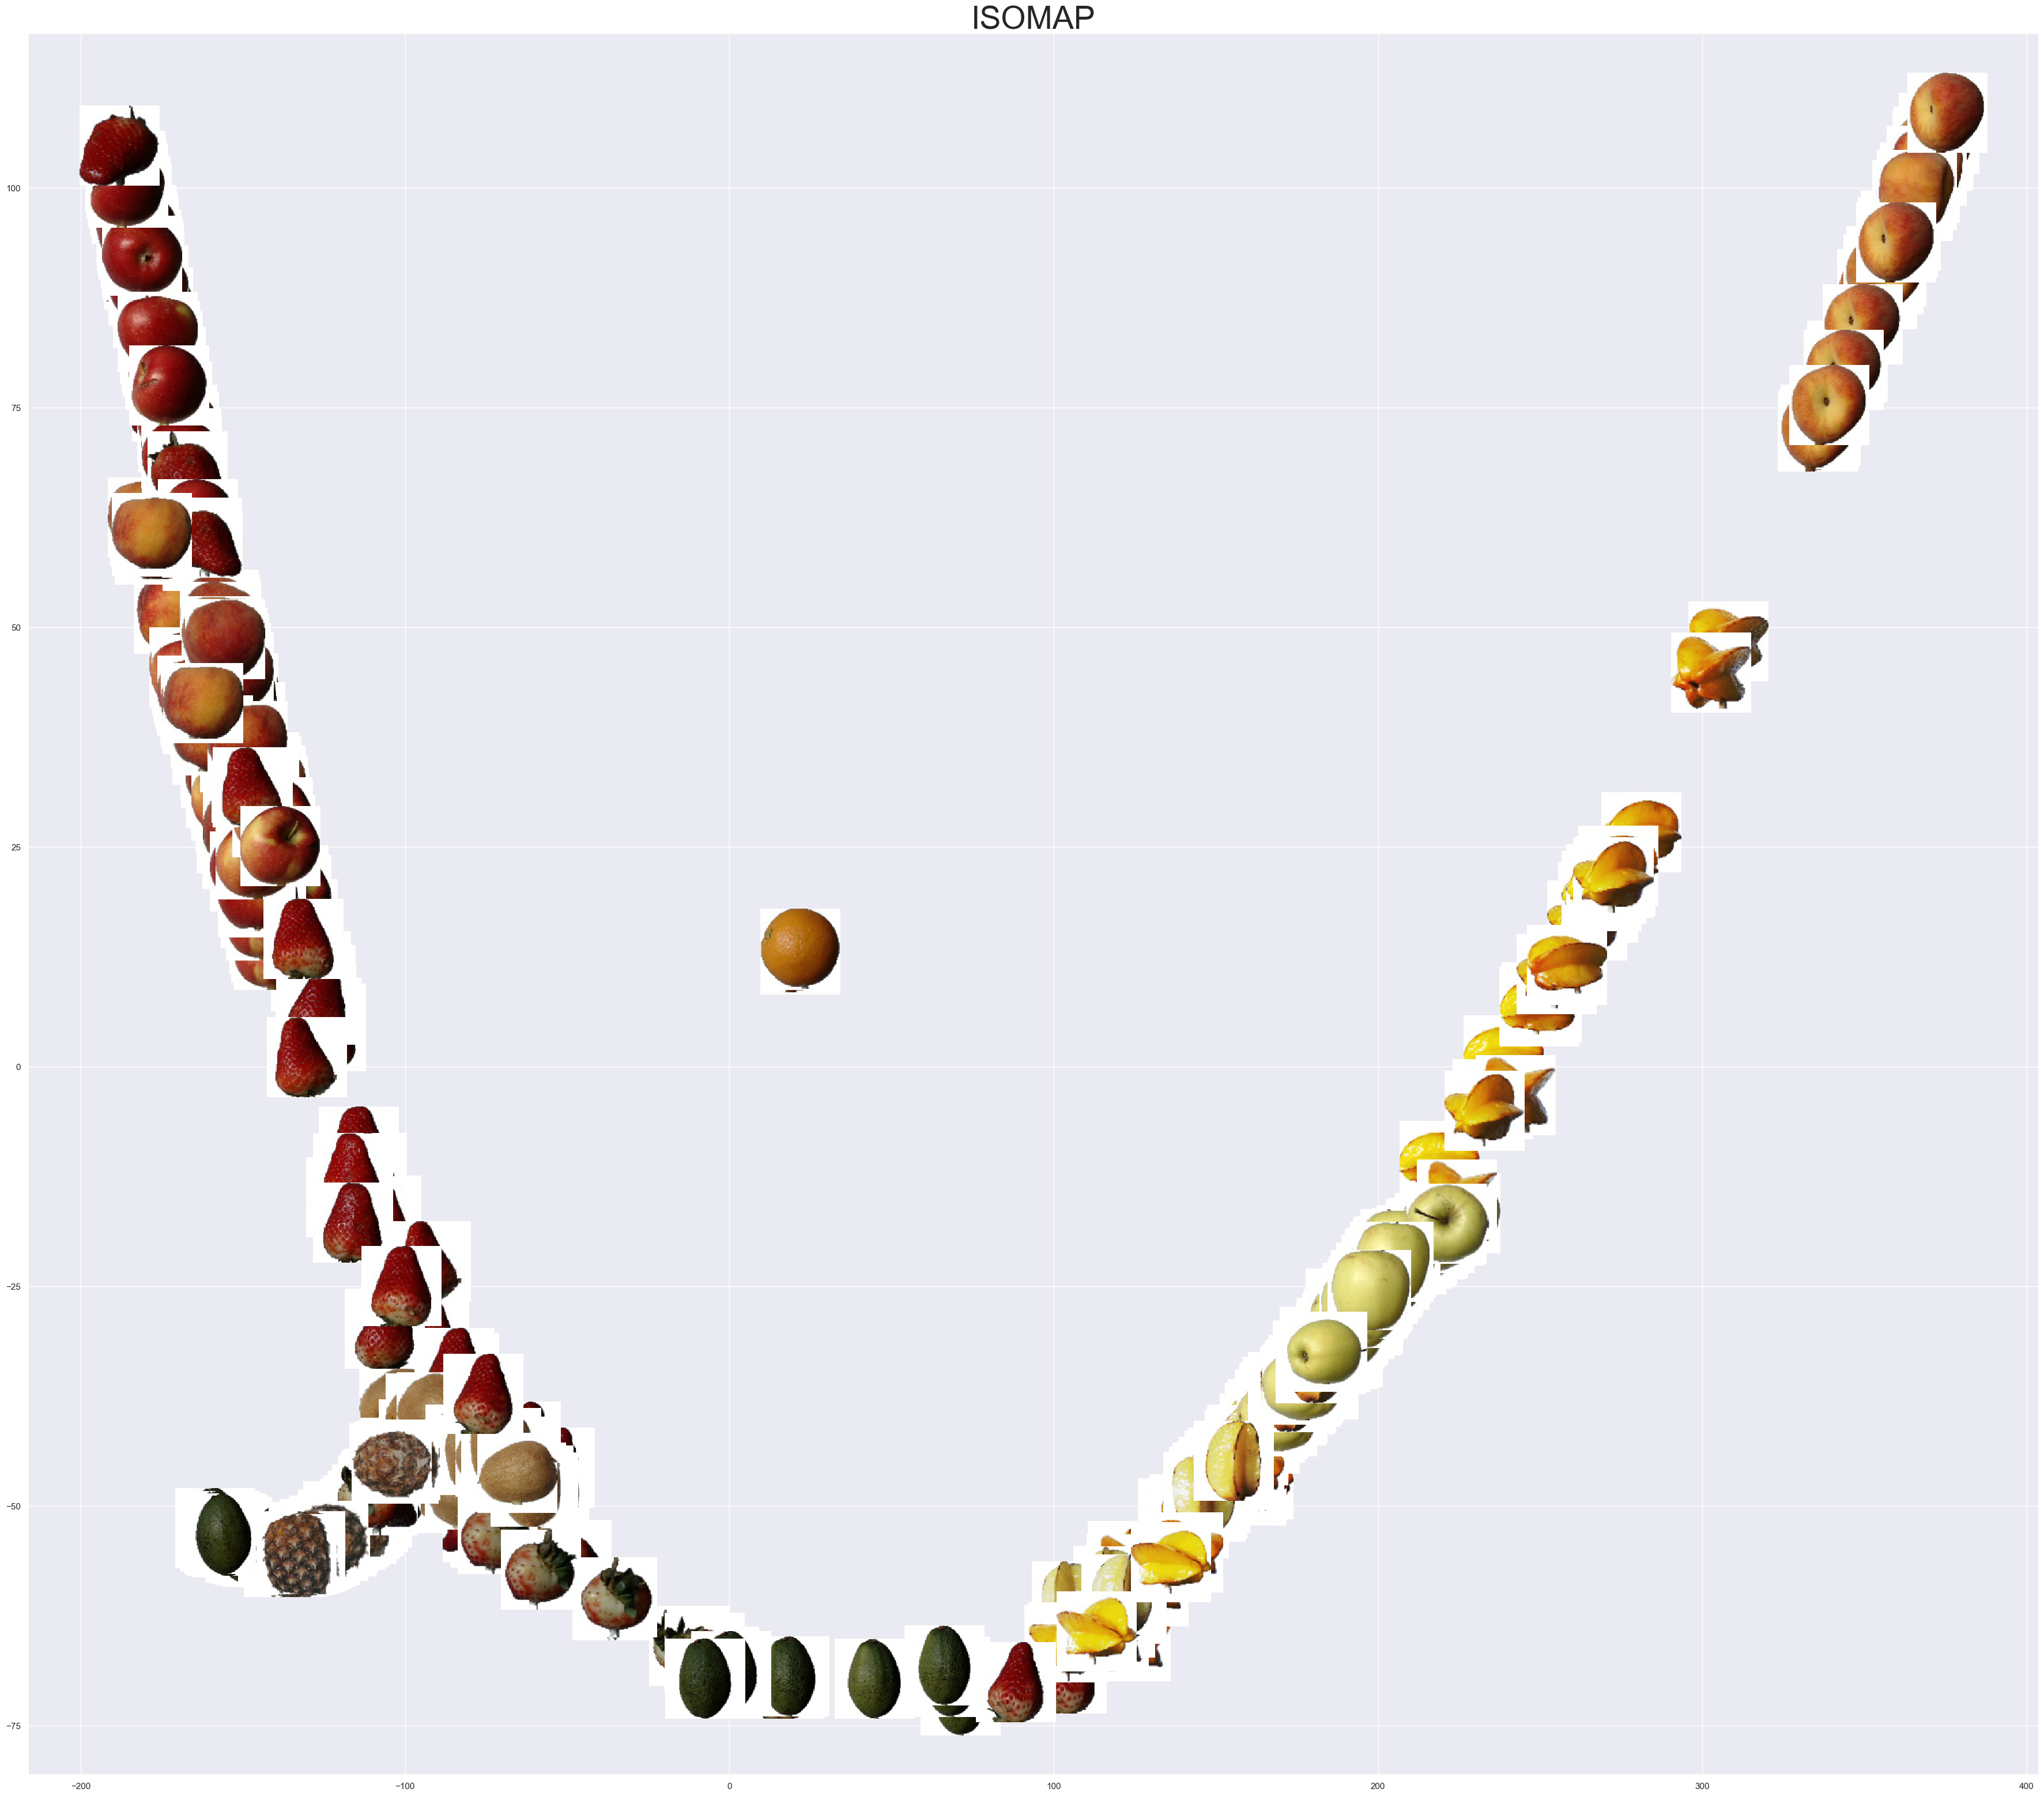

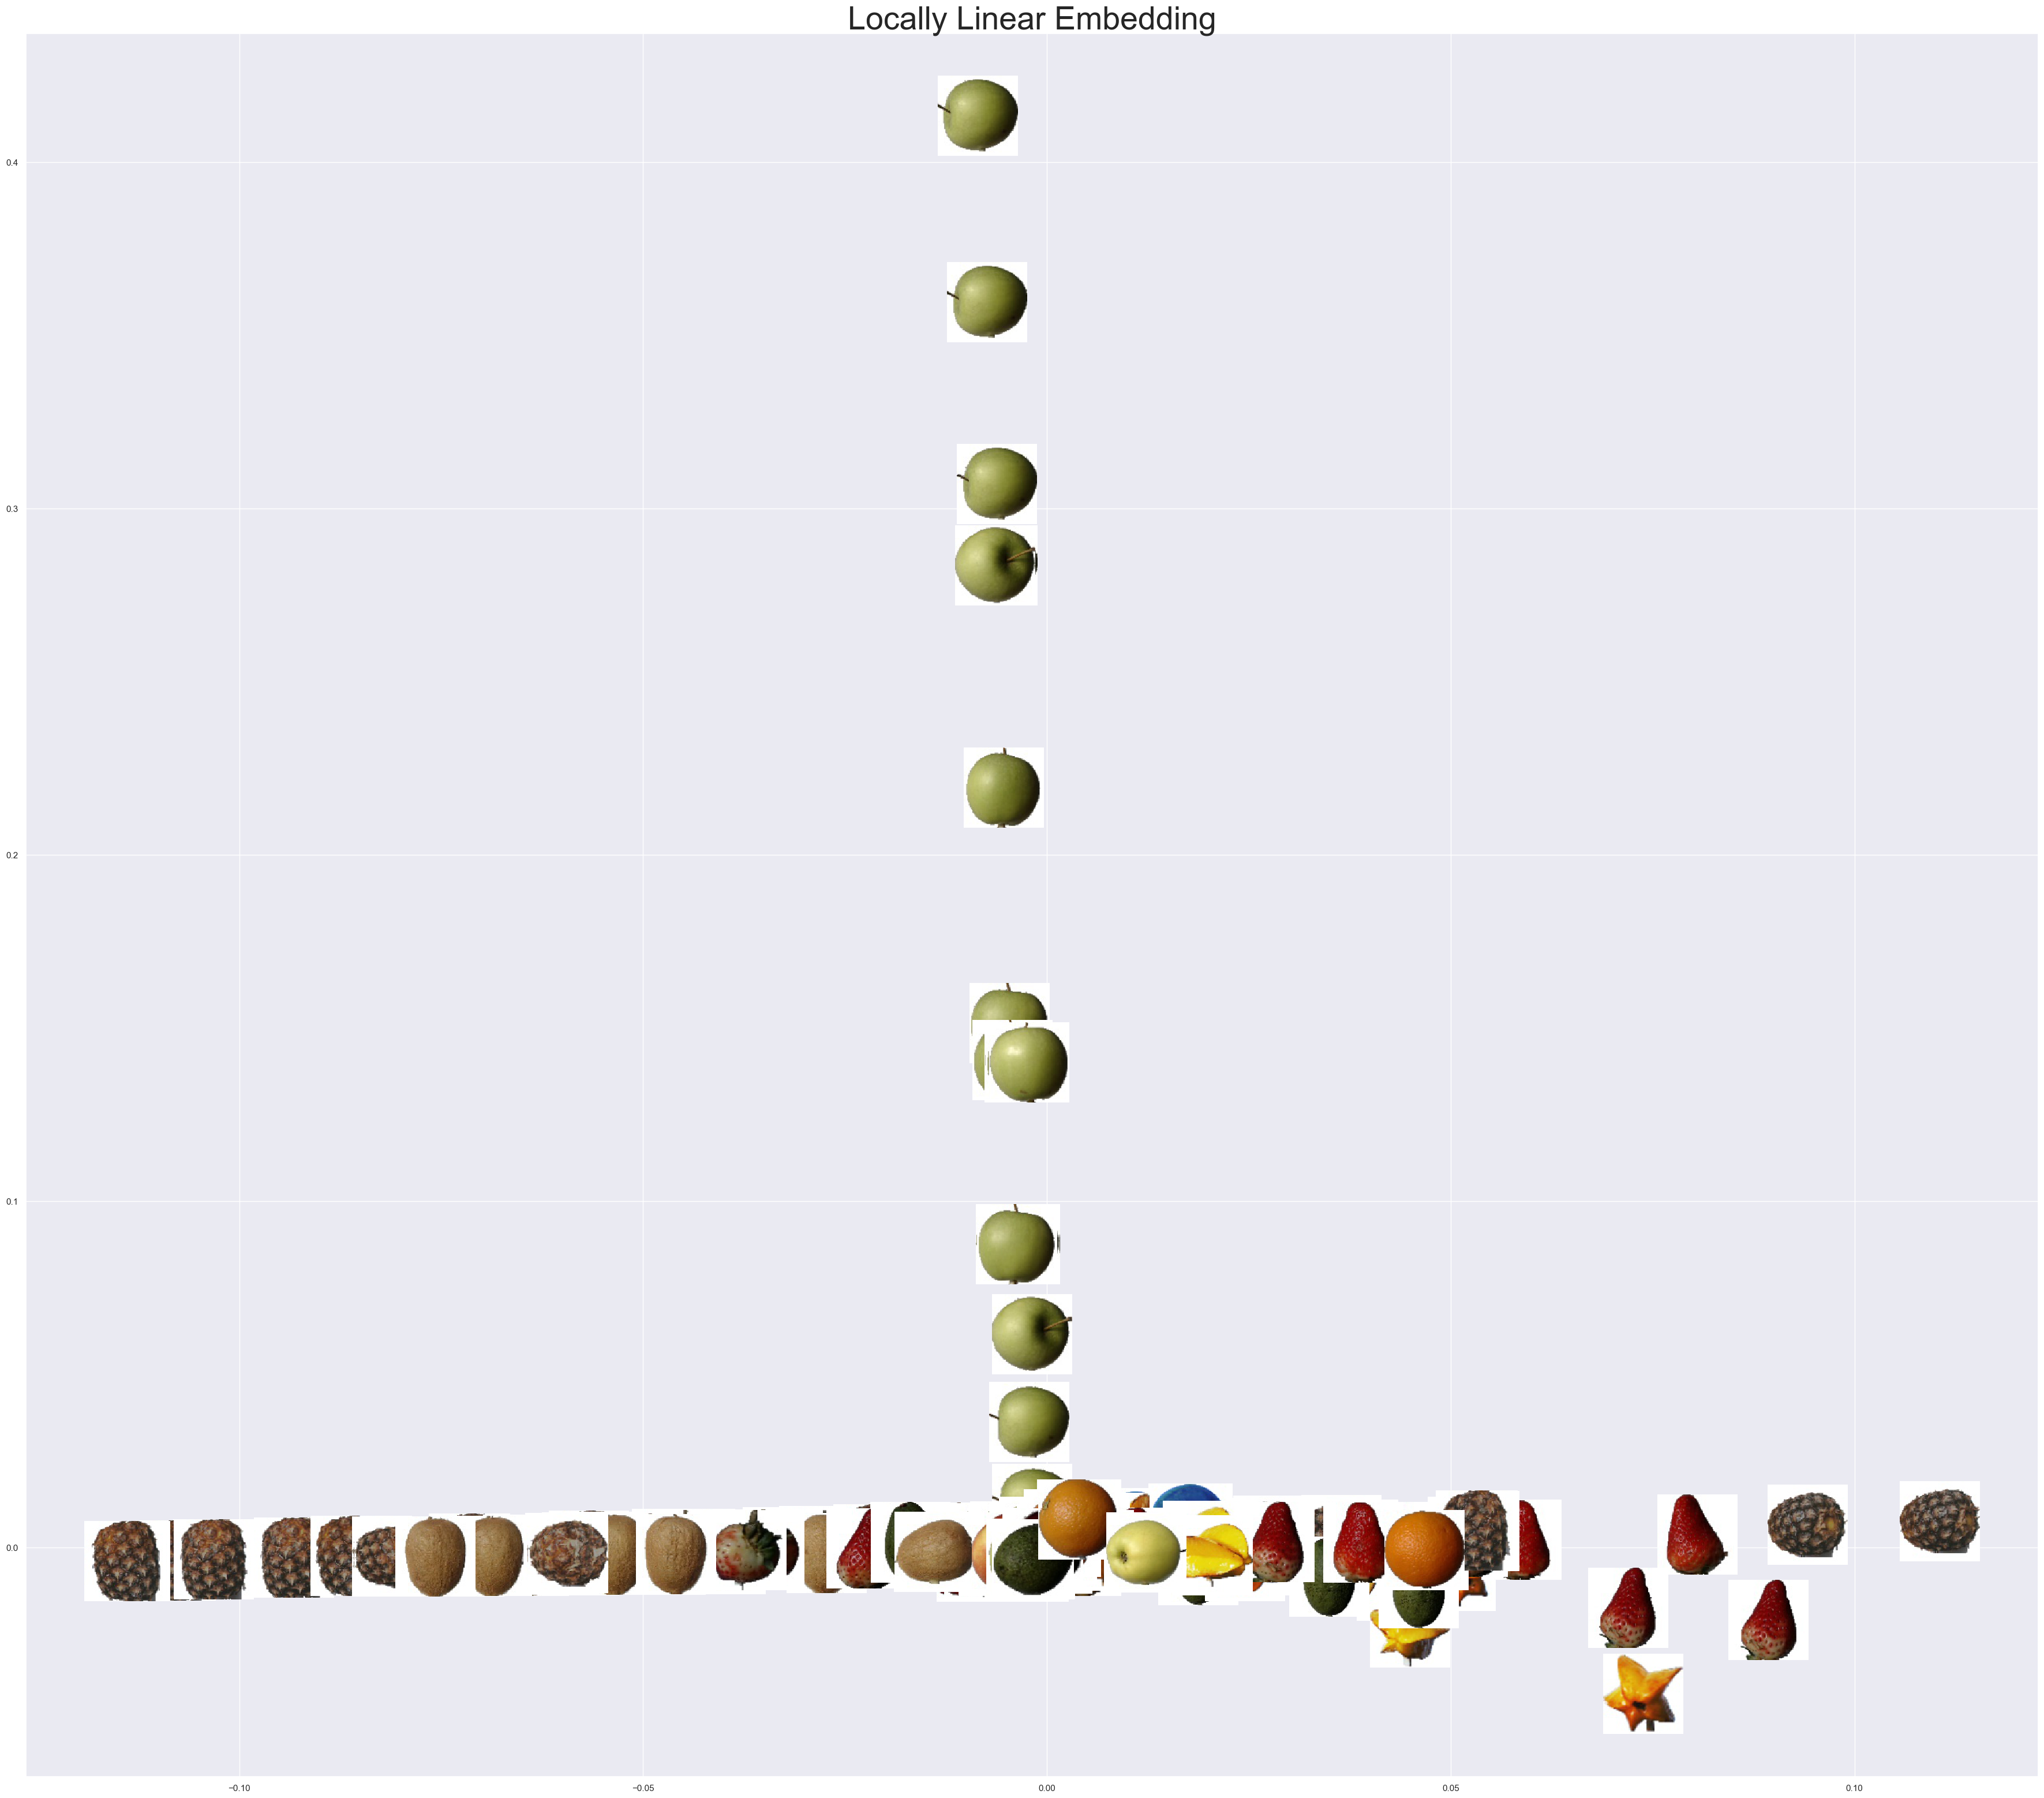

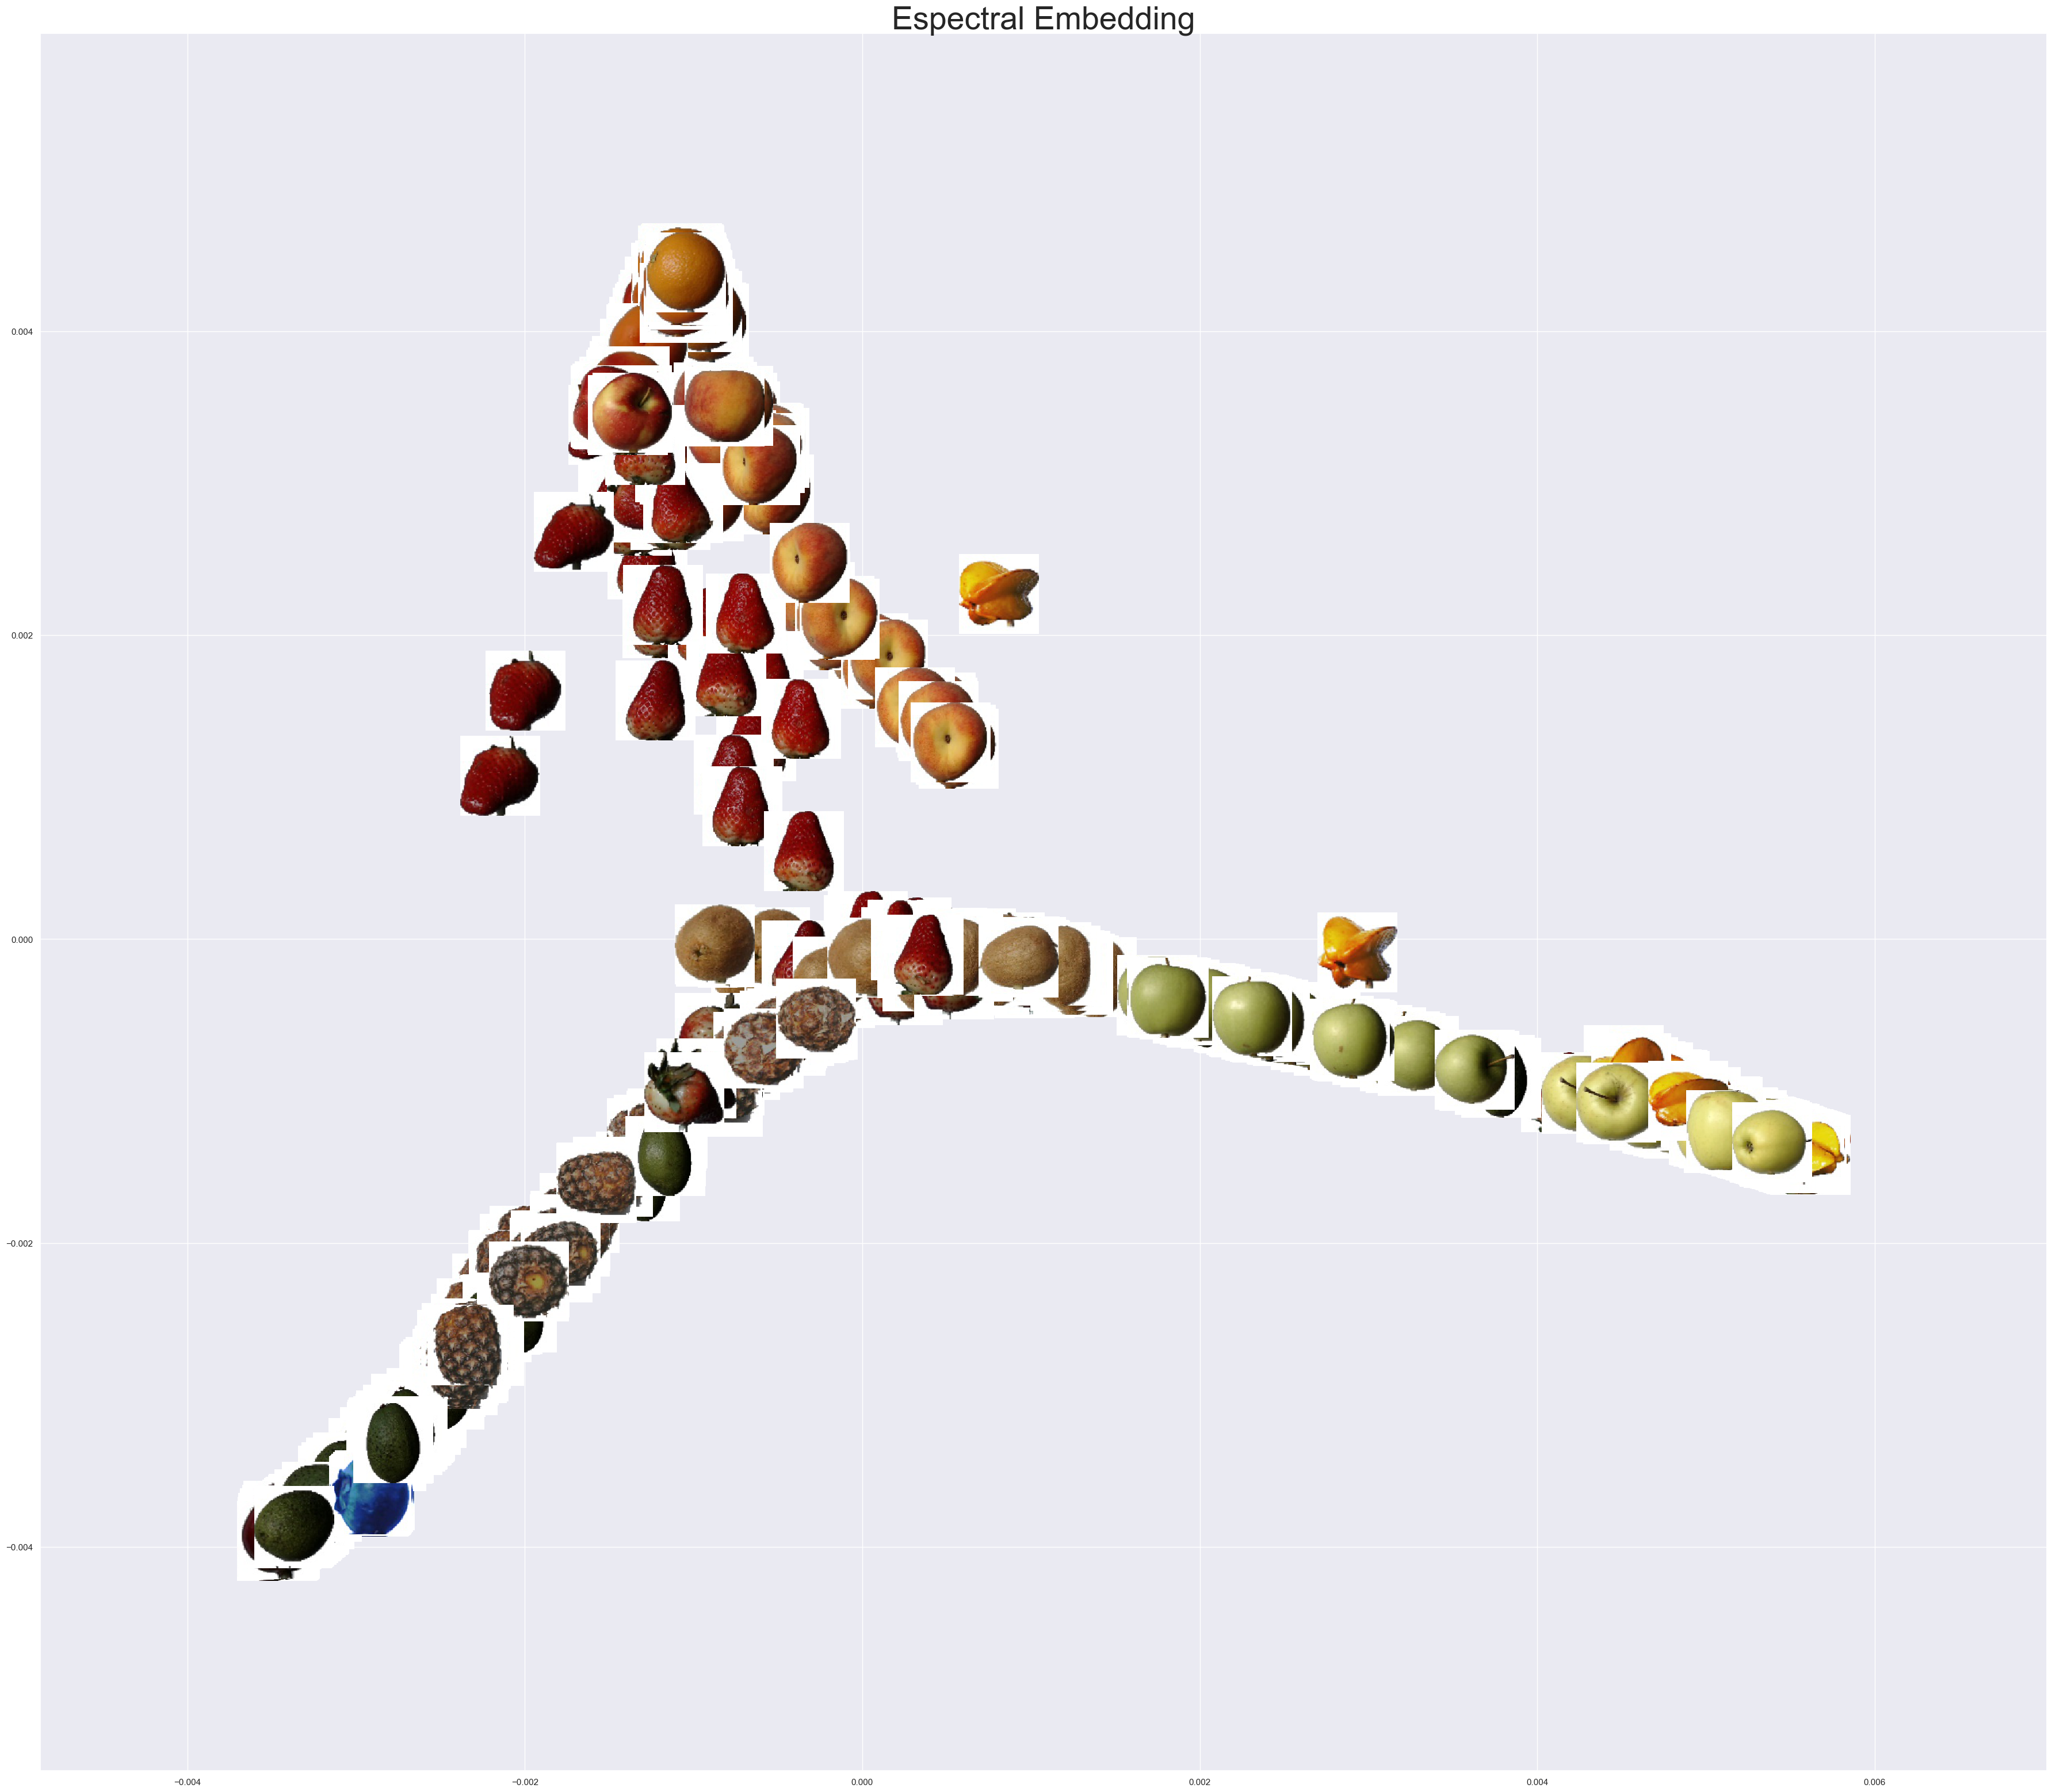

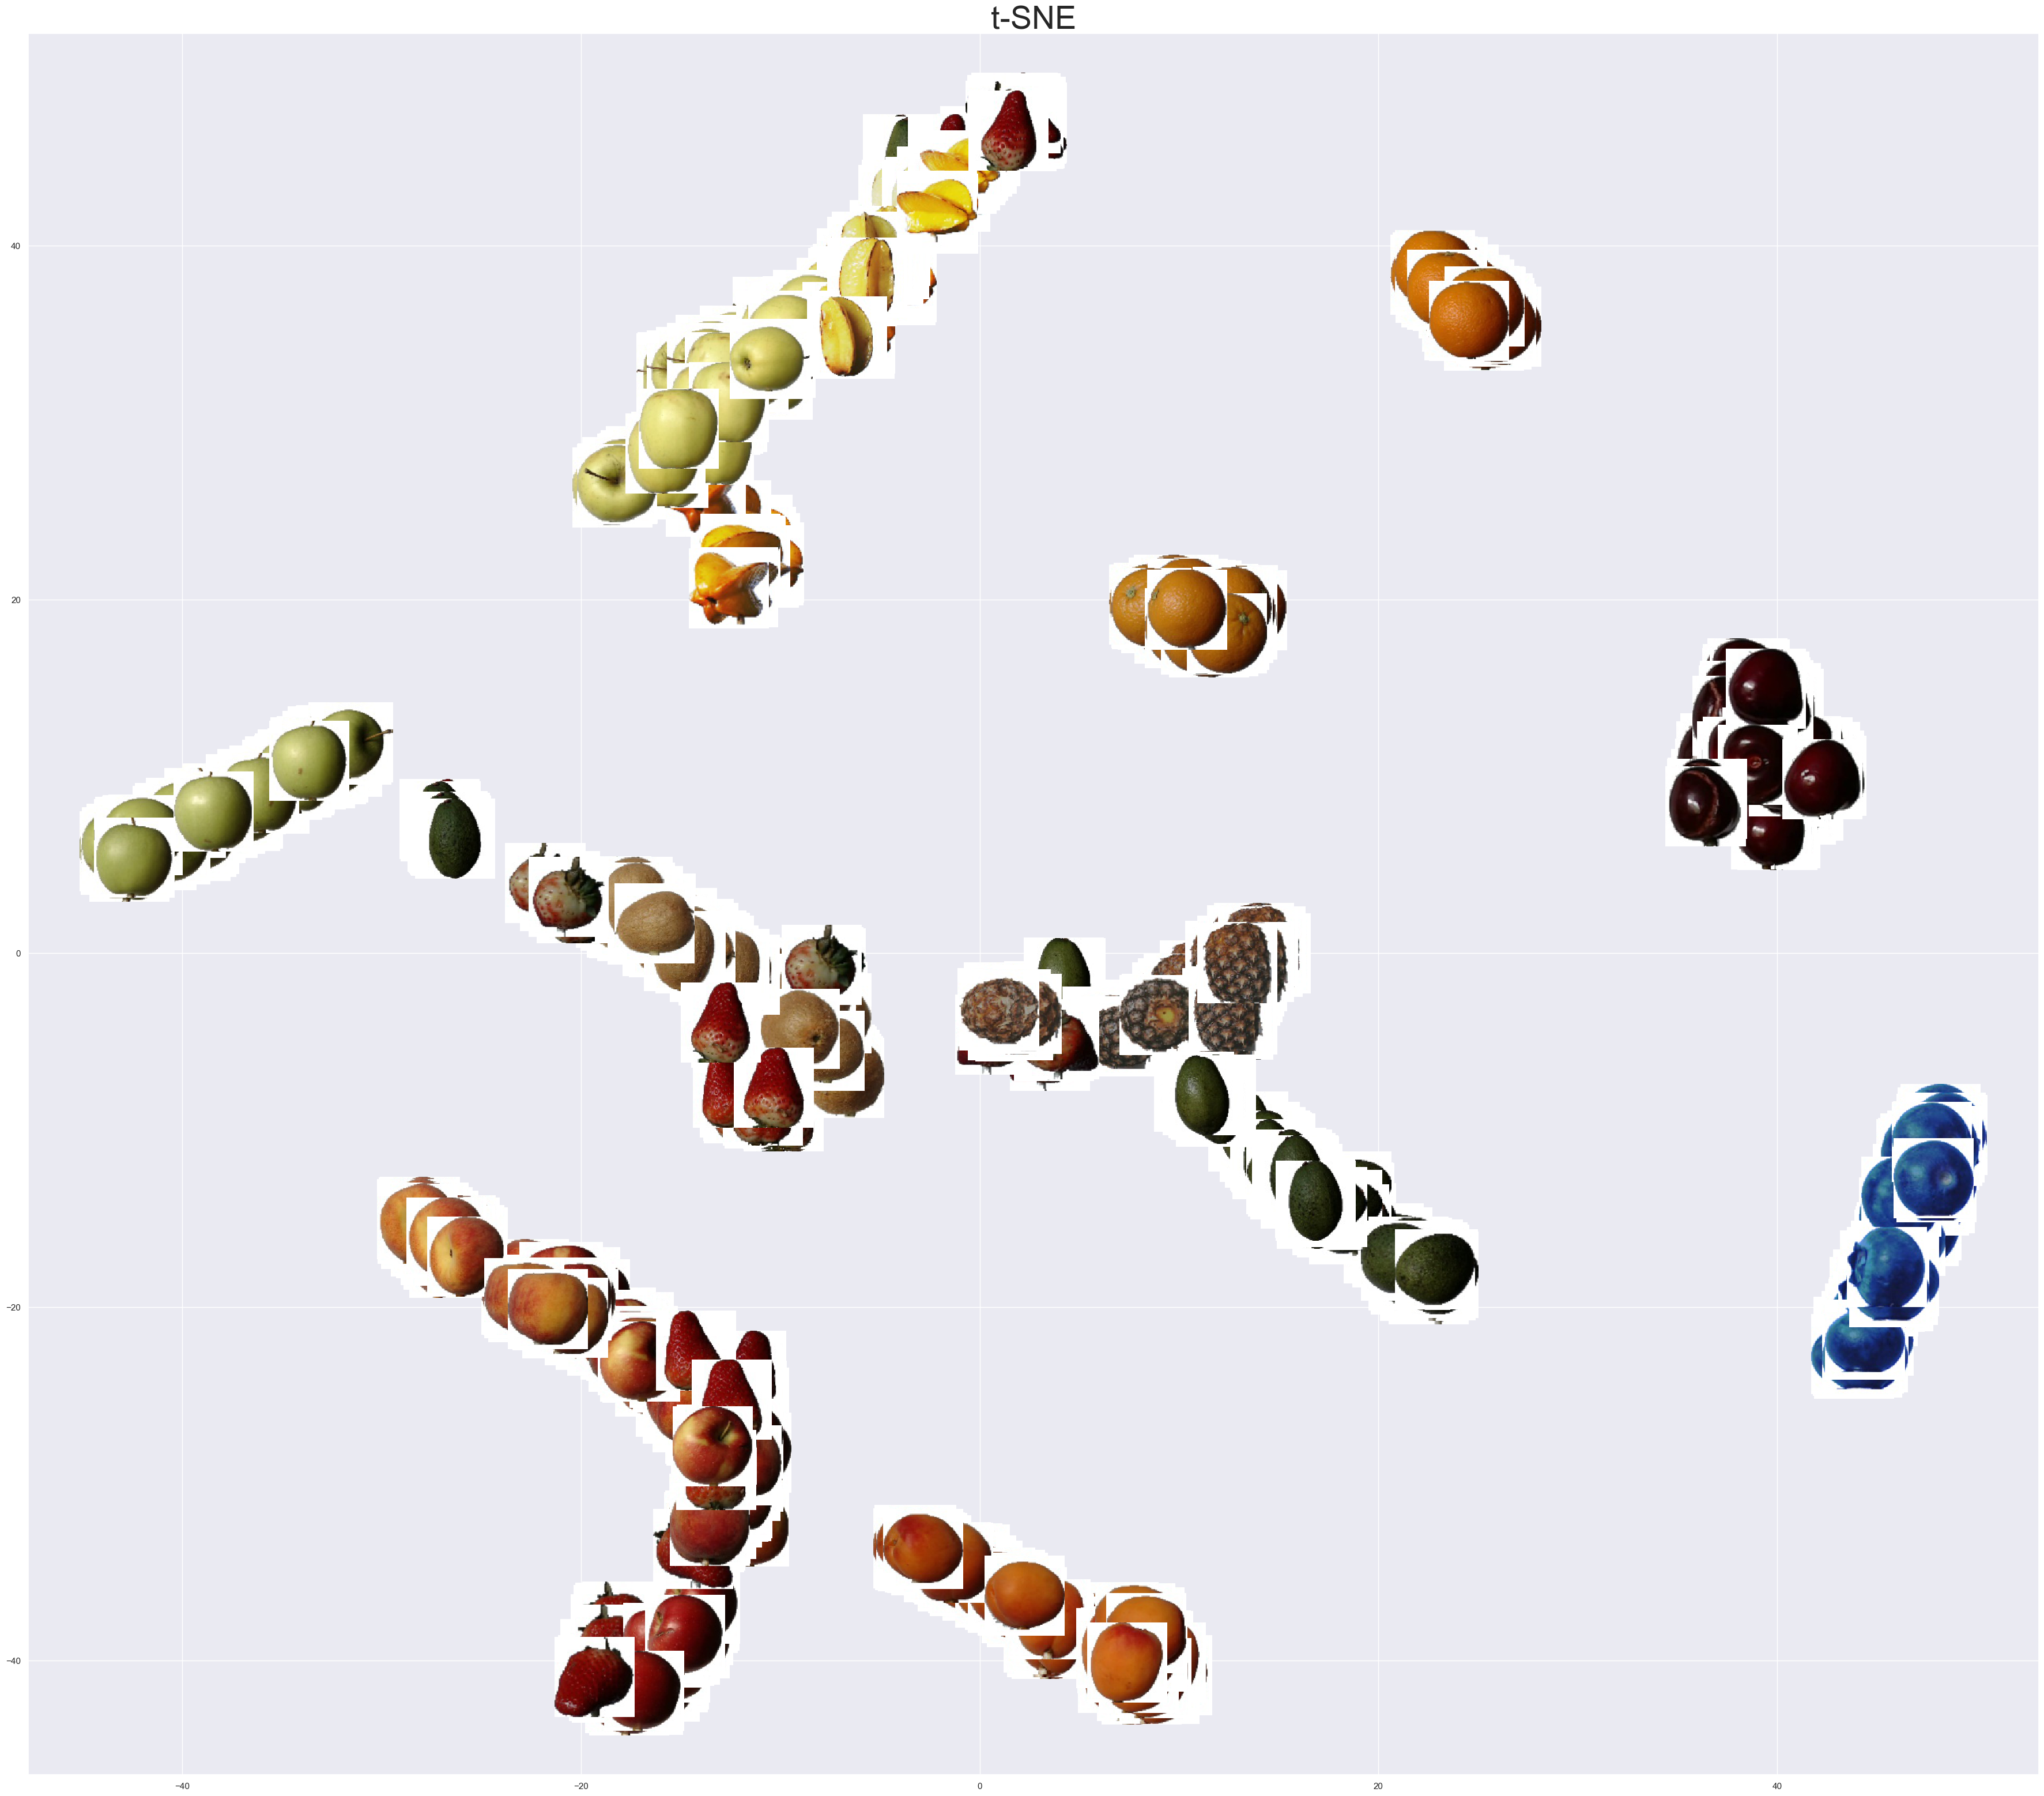

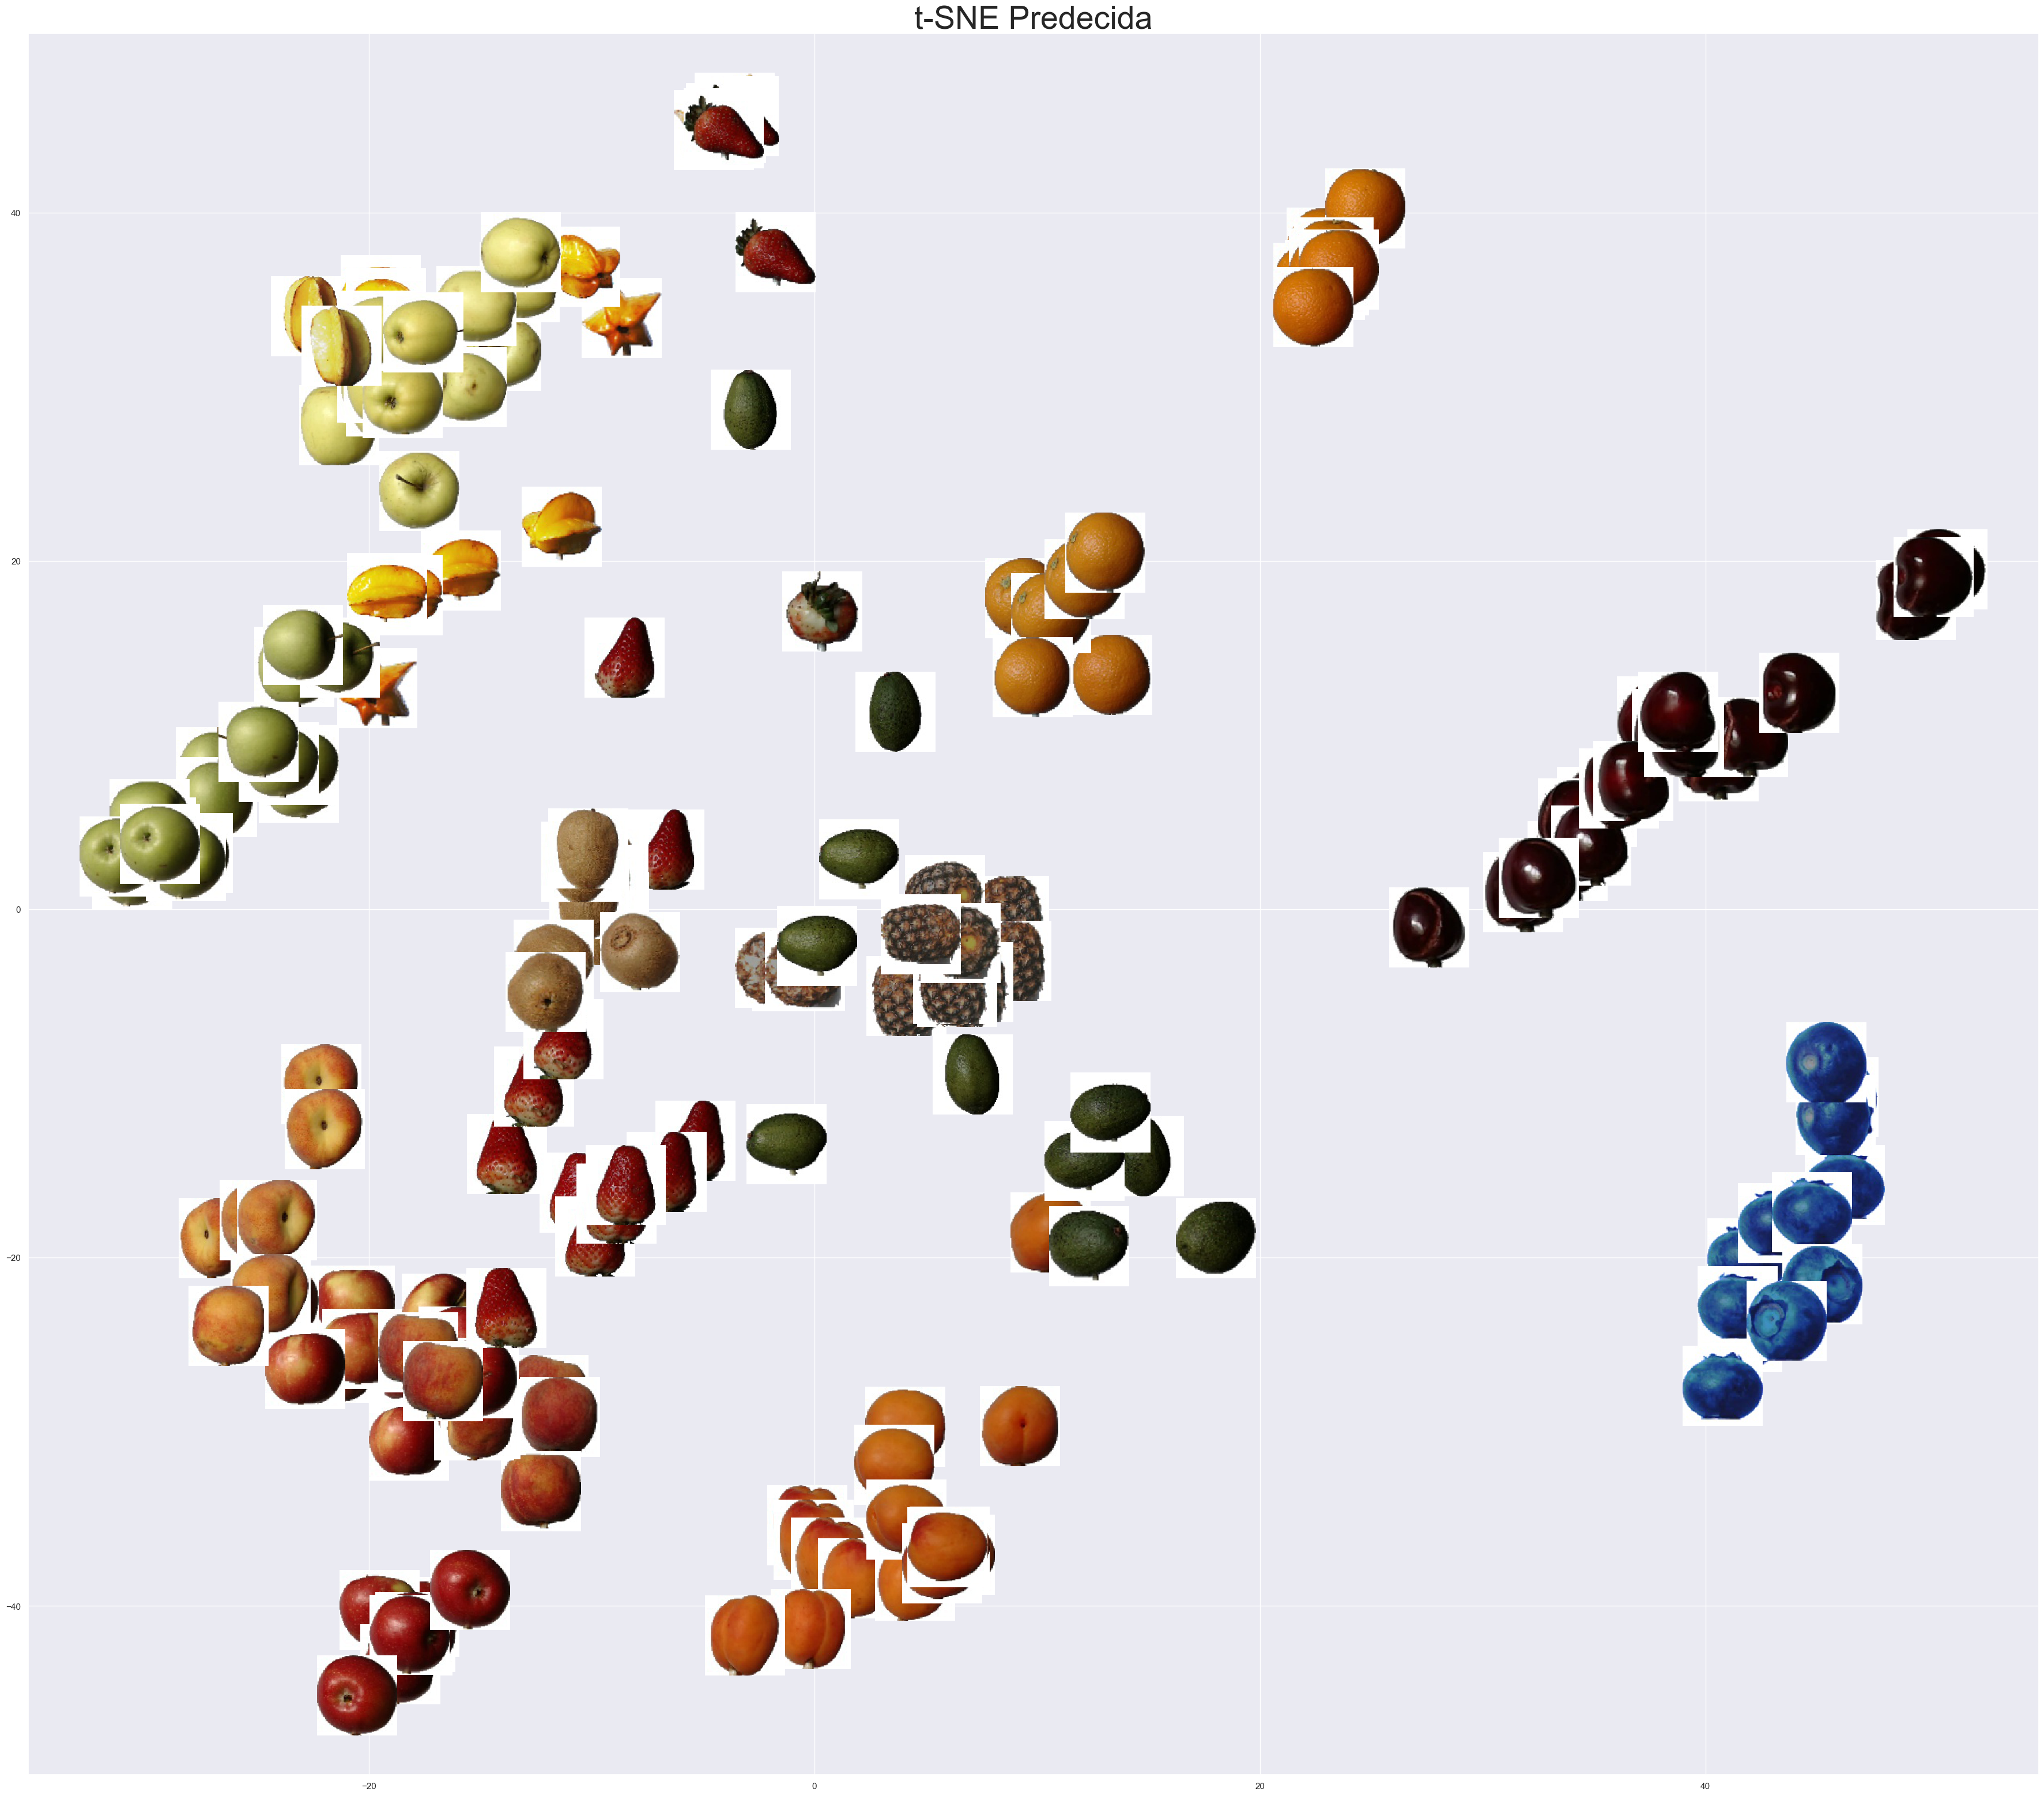

In [151]:
def make_analysis(x_tra,label):
    
    #Compute and plot ISOMAP
    from sklearn.manifold import Isomap
    embedding = Isomap(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_fruits1(X_transformed,files_train,0)
    
    #Compute and plot Locally linear embaddings
    from sklearn.manifold import LocallyLinearEmbedding
    embedding = LocallyLinearEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_fruits1(X_transformed,files_train,1)
     
    #plot Spectral Embedding
    from sklearn.manifold import SpectralEmbedding
    embedding = SpectralEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_fruits1(X_transformed,files_train,3)
    
    #plot t-SNE
    from sklearn.manifold import TSNE
    embedding = TSNE(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_fruits1(X_transformed,files_train,4)
    
    from sklearn.neural_network import MLPRegressor
    regr = MLPRegressor(random_state=40, max_iter=1000).fit(x_tra,X_transformed)
    X_test_trans=regr.predict(x_te)
    plot_fruits1(X_test_trans,files_test,5)

make_analysis(x_tra,y_train)